<a href="https://colab.research.google.com/github/Shulinagarwal/Neural_Networks_Classification/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neutral Network classification with Pytorch
Classification is a problem of predicting whether something is one thing or another
(there can be multiple things as an option)

#Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#Making 1000 samples
n_samples=1000

#Create circles

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of x:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [ ]:
#Make DataFrame of circle data
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


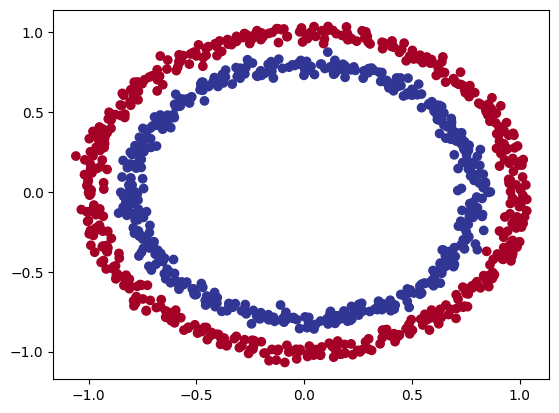

In [ ]:
#visualize, visualize, visualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

**Note**: The data we're working with id often referred to as a toy dataset ,a dataset thet is small enough to experiment but still sizeable enough to practice the fundamentals.

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

##Turn data in tensors

In [ ]:
#turn data into tensors
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2.Building a model


Let's build a model to classify our blue and red dots.

to do so ,we want to:
1. Setup Device agoinistic code our code will run on an accelerator (GPU)if there is one
2. Construct a model
3. Define a loss function and optimizer
4. Creating a  training and test loop

In [ ]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agonistic code,we can build a model.

1. Subclass `nn.Module` (almost all model in Pytorch subclass `nn.Module`)
2. Create 2 `nn.linear` layers that are capable of handling the shapes of our data
3. Defines a `forward` method that outlines the forward pass of the model_selection
4. Instantiate an instance of our model and send it to the target device

In [ ]:
#Construct a model that subclasses nn.Moduel
class circlesModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5)# takes in 2 features and upscales to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  # 3. define a forward method taht outlined the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x -> layer 1 ->layer 2

#4. Instantiate an instance of our model class and send it to the target device
model_0= circlesModelV0().to(device)
model_0

circlesModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Let's replicate the model above using nn.Sequential

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0792, -0.2463],
                      [-0.0537,  0.3107],
                      [ 0.1095,  0.3722],
                      [ 0.4344, -0.2784],
                      [ 0.4370,  0.0698]])),
             ('0.bias', tensor([-0.3228, -0.5701,  0.5580,  0.4280,  0.4190])),
             ('1.weight',
              tensor([[-0.2453, -0.3222,  0.2332, -0.1121,  0.2594]])),
             ('1.bias', tensor([-0.2608]))])

In [ ]:
#Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
untrained_preds

tensor([[0.2111],
        [0.2874],
        [0.0733],
        [0.2499],
        [0.1722],
        [0.2180],
        [0.3545],
        [0.3385],
        [0.0694],
        [0.2936],
        [0.2091],
        [0.2352],
        [0.3513],
        [0.0633],
        [0.0535],
        [0.2834],
        [0.3075],
        [0.1750],
        [0.1713],
        [0.1322],
        [0.2896],
        [0.2997],
        [0.1494],
        [0.1453],
        [0.3456],
        [0.3414],
        [0.0701],
        [0.2516],
        [0.0437],
        [0.0794],
        [0.3175],
        [0.3450],
        [0.2239],
        [0.1246],
        [0.2116],
        [0.2840],
        [0.2393],
        [0.0636],
        [0.1023],
        [0.0687],
        [0.1407],
        [0.0787],
        [0.3057],
        [0.1602],
        [0.2292],
        [0.2931],
        [0.1901],
        [0.2903],
        [0.2699],
        [0.1993],
        [0.2439],
        [0.2342],
        [0.2692],
        [0.1384],
        [0.3136],
        [0

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use?

Again.... this is problem specific

For example for regression you might want MAE or MSELoss

For classification you might want to go BCE or CrossEntropyLoss

In [ ]:
#Setup the loss function

loss_fn=nn.BCEWithLogitsLoss() #BCEwithLogitsLoss() contains sigmoid activation function built-in

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
#Calculate the accuracy  -out of 100 examples ,what pecentage our model get right
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc*100

## 3. Train Model

1. Forward pass
2. Calculate trhe loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits->prediction probablities -> prediction labels

Our model outputs are going ti be raw ** logits**

We can convert these **logits** into prediction probabilities by passing them to
some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass activation).

Then we can convert our prediction probablities to **prediction labels** by either rounding them or taking the argmin.

In [ ]:
#View ther firast 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))
y_logits[:5]

tensor([[0.2111],
        [0.2874],
        [0.0733],
        [0.2499],
        [0.1722]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# sigmoid activation function on our model logits to prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5526],
        [0.5714],
        [0.5183],
        [0.5621],
        [0.5429]])

In [ ]:
torch.round(y_pred_probs[:5])


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
#find the predicted labels
y_preds=torch.round(y_pred_probs)

#in full (logits->prediction probabilities)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze()[:5], y_pred_labels.squeeze()[:5]))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs=1000

#Put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  #1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss and accuracy
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #3. Optimizer zeri grad
  optimizer.zero_grad();

  #4. Loss backward
  loss.backward();

  #5. optimiser step
  optimizer.step();

  ### Testing

  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss and accuracy
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} , Test Acc:{test_acc}%")

Epoch: 0 | Loss: 0.69816, Acc: 50.00% | Test Loss: 0.70218 , Test Acc:50.0%
Epoch: 10 | Loss: 0.69466, Acc: 56.12% | Test Loss: 0.69853 , Test Acc:51.0%
Epoch: 20 | Loss: 0.69363, Acc: 53.00% | Test Loss: 0.69729 , Test Acc:47.5%
Epoch: 30 | Loss: 0.69331, Acc: 51.75% | Test Loss: 0.69679 , Test Acc:46.5%
Epoch: 40 | Loss: 0.69320, Acc: 51.75% | Test Loss: 0.69654 , Test Acc:47.0%
Epoch: 50 | Loss: 0.69315, Acc: 51.25% | Test Loss: 0.69638 , Test Acc:46.5%
Epoch: 60 | Loss: 0.69313, Acc: 51.00% | Test Loss: 0.69627 , Test Acc:46.0%
Epoch: 70 | Loss: 0.69311, Acc: 50.75% | Test Loss: 0.69617 , Test Acc:46.5%
Epoch: 80 | Loss: 0.69310, Acc: 50.62% | Test Loss: 0.69608 , Test Acc:46.5%
Epoch: 90 | Loss: 0.69309, Acc: 50.75% | Test Loss: 0.69600 , Test Acc:46.5%
Epoch: 100 | Loss: 0.69308, Acc: 50.75% | Test Loss: 0.69593 , Test Acc:46.5%
Epoch: 110 | Loss: 0.69307, Acc: 50.88% | Test Loss: 0.69586 , Test Acc:47.0%
Epoch: 120 | Loss: 0.69306, Acc: 50.88% | Test Loss: 0.69580 , Test Acc:47.

## 4. Make predictions and evaluate the model

From the metrices it looks like our model is learning anything ..


So to inspect it let's make some predictions and make them visual!

in other words "Visualize,Visualize,Visualize"

to do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

#Download Helper functions from Learn Pytorch repo

if(Path("helper_functions.py").is_file()):
  print("Helper functions already downloaded")
else:
  print("Downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary,plot_predictions

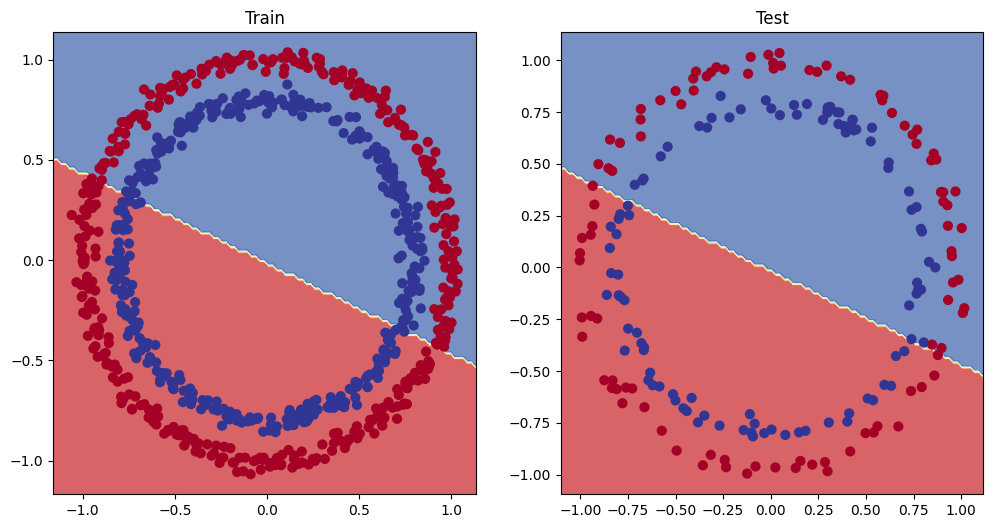

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Imporving a model(from a model perspective)

* Add more layers-give the model more chances to learn about patterns in the data
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss Function


Let's try to improve our model by:
  * Adding more hidden units5->10
  * Adding more layers 2 -> 3
  * Increasing no. of epochs 100 ->1000

In [ ]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function

loss_fn=nn.BCEWithLogitsLoss() #BCEwithLogitsLoss() contains sigmoid activation function built-in

#Create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 10000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Evaluation
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} , Test Acc:{test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261 , Test Acc:51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379 , Test Acc:48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437 , Test Acc:46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458 , Test Acc:45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465 , Test Acc:46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467 , Test Acc:46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 1000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 1100 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468 , Test Acc:46.00%
Epoch: 1200 | Loss: 0.69298, Acc: 51.00% | Test Loss

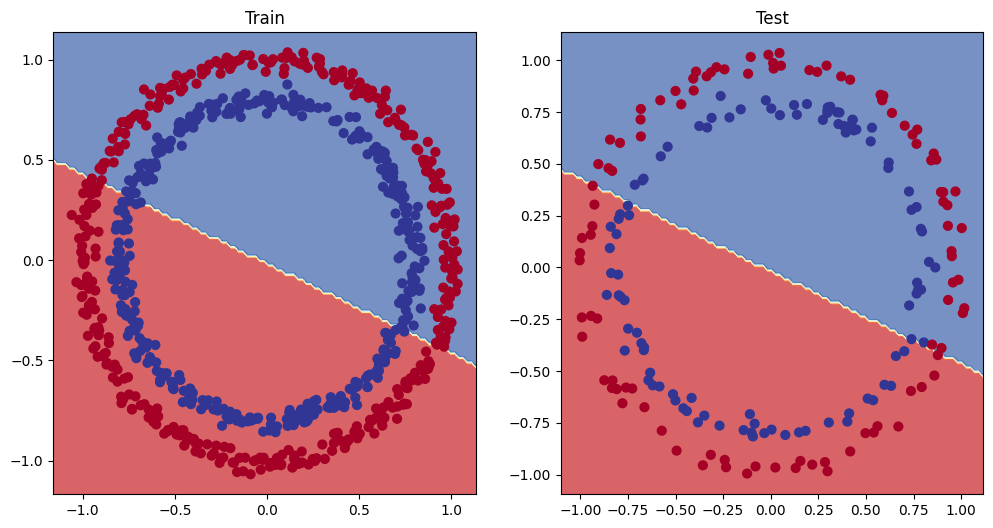

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


## Preparing a dat to see iof the model can fit a straight line
One way to trobleshoot to a larger problem  is to test out a smaller problem


In [ ]:
#Create some data
weight=0.7
bias=0.3
start=0
end=1
step=0.01

#Create data
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

X_regression[:5],y_regression[:5]

#check the data
print(len(X_regression),len(y_regression))
X_regression[:5],y_regression[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#create train and test splits
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

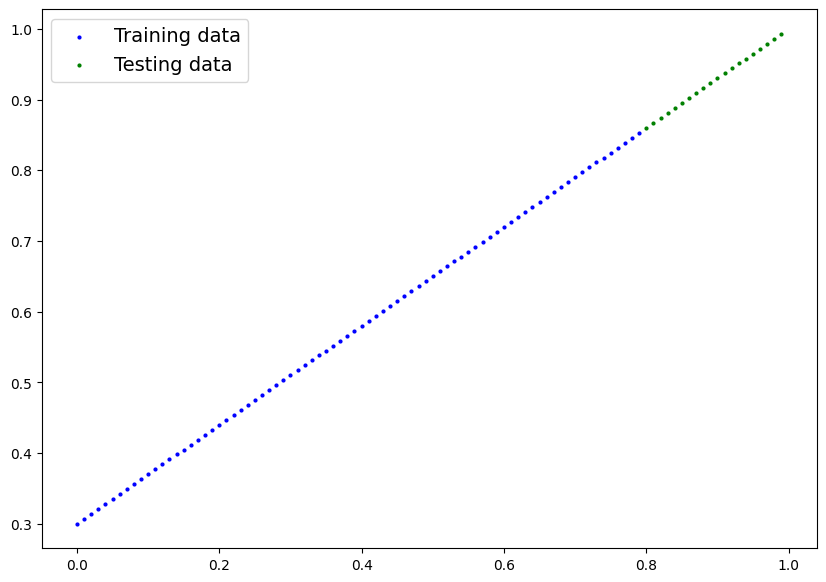

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

## Adjusting model 1 to fit a Stright line

In [ ]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000


X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


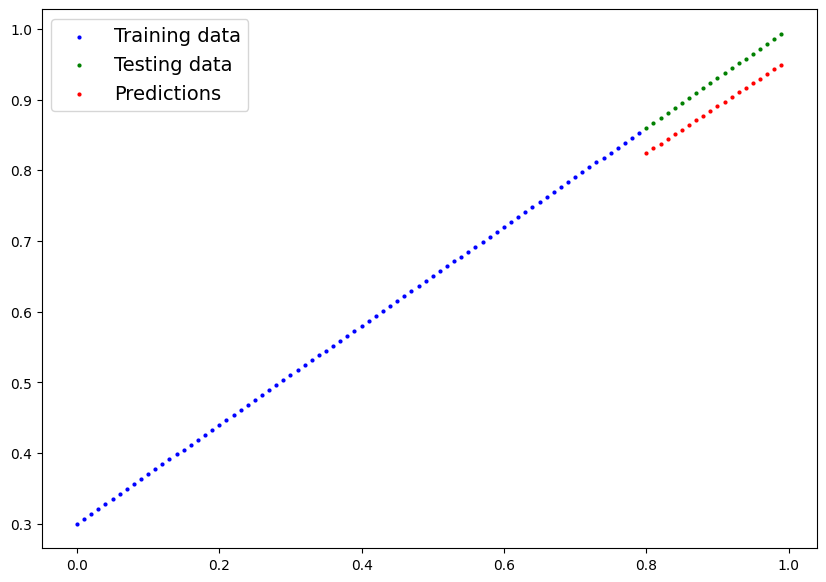

In [ ]:
#Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

###Non- linearity

In [ ]:
from sklearn.datasets import make_circles

#Making 1000 samples
n_samples=1000

#Create circles

X,y=make_circles(n_samples,noise=0.03,random_state=42)

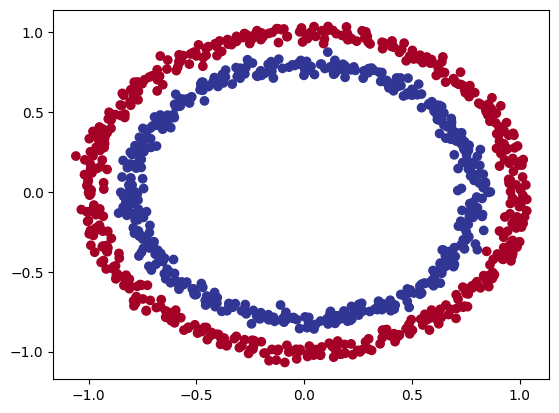

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#turn data into tensors
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## building the model with non-Linearity
* Linear= Staright lines
* Non-linear= curves


In [ ]:
# Build a model with non-linear activation finctions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#Setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),
                          lr=0.1)


#spam or not spam
#credit cards=fraud or not fraud
#insurance claims

### 6. Trainig a model with non-linaerity

In [ ]:
#Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000

X_test,y_test=X_test.to(device),y_test.to(device)
X_train,y_train=X_train.to(device),y_train.to(device)


for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} , Test Acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319 , Test Acc:50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102 , Test Acc:52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940 , Test Acc:55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723 , Test Acc:56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411 , Test Acc:56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941 , Test Acc:56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285 , Test Acc:56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322 , Test Acc:59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757 , Test Acc:67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145 , Test Acc:79.00%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test Loss: 0.57378 , Test Acc:86.50%
Epoch: 1100 | Loss: 0.48153, Acc: 93.50% | Test Loss: 0.49935 , Test Acc:90.50%
Epoch: 1200 | Loss: 0.37056, Acc: 97.75% | Test Loss

In [ ]:
## 6.4 Evaliuating a model trained with non-llinear activation functions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

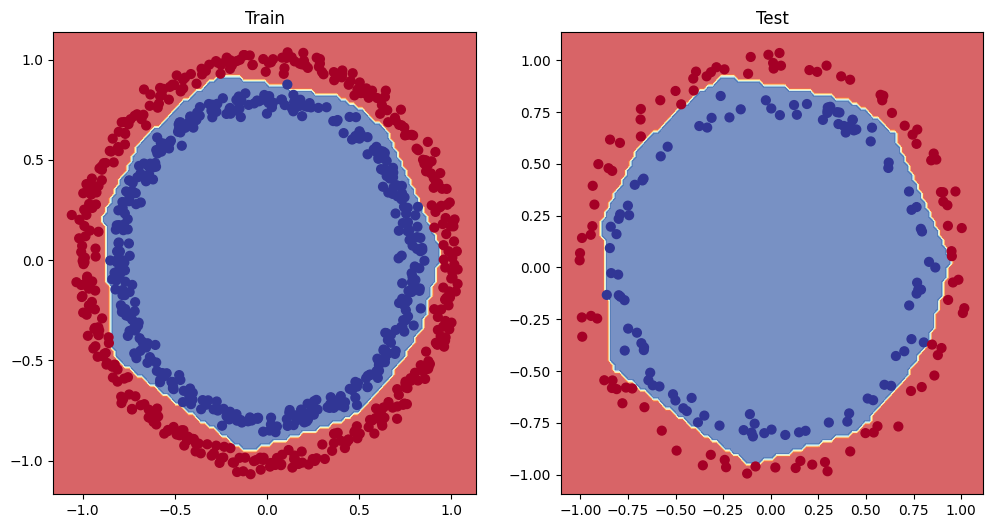

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## 8. Buiolding a multiclass toy dataset and model and evaluating it

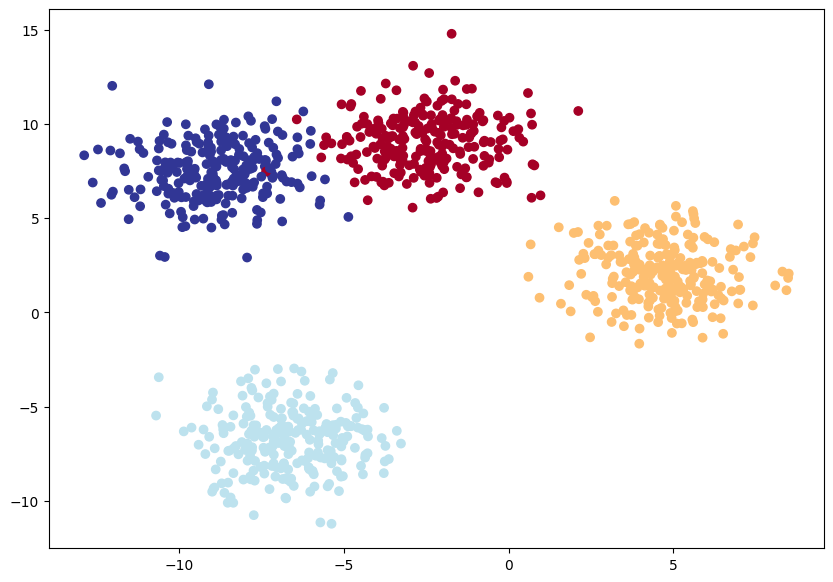

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#1. Create multi-class data
X_blob,y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#3. Split data into training and test sets
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,
                                                                   y_blob,
                                                                   test_size=0.2,
                                                                   random_state=RANDOM_SEED)

#4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class calssification model inPytorch

In [ ]:
#Create device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of linear model
model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and optimizer for our multiclass model

In [ ]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)


### 8.4 Getting prediction Probabilities for a multi-class model

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287],
        [-0.4885, -2.0119, -0.4004, -1.3252],
        [ 0.2586, -0.8477,  0.2739, -0.8695],
        [ 0.6816, -1.1144,  0.2053, -0.6434],
        [ 0.3433, -1.0156,  0.4706, -1.1226],
        [ 0.7687, -1.0243,  0.2629, -0.5887]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
#Convert our model's logit output to prediction probablities

y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228],
        [0.3645, 0.0795, 0.3981, 0.1579],
        [0.3745, 0.1239, 0.3803, 0.1212],
        [0.4871, 0.0808, 0.3025, 0.1295],
        [0.3812, 0.0979, 0.4329, 0.0880],
        [0.4934, 0.0821, 0.2975, 0.1270]])

In [ ]:
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## Create a training and testing loop

In [ ]:
#Fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
epochs=200

#Put data to the target device
X_blob_train, y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test, y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_blob_train)

  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_preds)

  if(epoch % 10 == 0):
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} , Test Acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 0.04707, Acc: 98.88% | Test Loss: 0.03760 , Test Acc:99.00%
Epoch: 10 | Loss: 0.04277, Acc: 98.88% | Test Loss: 0.03401 , Test Acc:99.00%
Epoch: 20 | Loss: 0.03985, Acc: 98.88% | Test Loss: 0.03150 , Test Acc:99.00%
Epoch: 30 | Loss: 0.03775, Acc: 98.88% | Test Loss: 0.02948 , Test Acc:99.00%
Epoch: 40 | Loss: 0.03618, Acc: 98.88% | Test Loss: 0.02790 , Test Acc:99.00%
Epoch: 50 | Loss: 0.03496, Acc: 98.88% | Test Loss: 0.02662 , Test Acc:99.00%
Epoch: 60 | Loss: 0.03399, Acc: 98.88% | Test Loss: 0.02556 , Test Acc:99.50%
Epoch: 70 | Loss: 0.03320, Acc: 98.88% | Test Loss: 0.02466 , Test Acc:99.50%
Epoch: 80 | Loss: 0.03255, Acc: 98.88% | Test Loss: 0.02390 , Test Acc:99.50%
Epoch: 90 | Loss: 0.03200, Acc: 98.88% | Test Loss: 0.02323 , Test Acc:99.50%
Epoch: 100 | Loss: 0.03153, Acc: 98.88% | Test Loss: 0.02264 , Test Acc:99.50%
Epoch: 110 | Loss: 0.03113, Acc: 98.88% | Test Loss: 0.02211 , Test Acc:99.50%
Epoch: 120 | Loss: 0.03080, Acc: 98.88% | Test Loss: 0.02166 , 

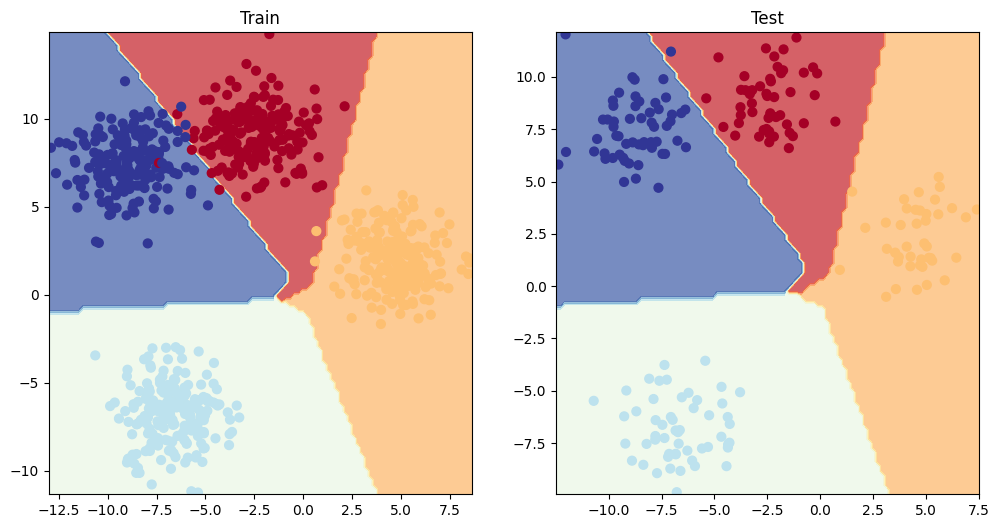

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)